Q1: What is Estimation Statistics? Explain point estimate and interval estimate.

Q2. Write a Python function to estimate the population mean using a sample mean and standard
deviation.

In [17]:
import math
import scipy.stats as stats

def population_mean(sample_mean, sample_std, sample_size, confidence_level=0.95):
    standard_error = sample_std / math.sqrt(sample_size)
    t_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)
    margin_of_error = t_value * standard_error
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error  
    return (lower_bound, upper_bound)

sample_mean = 20
sample_std = 3
sample_size = 28
confidence_level = 0.95

confidence_interval = population_mean(sample_mean, sample_std, sample_size, confidence_level)
print(f"The population mean is estimated to be between {confidence_interval[0]:.2f} and {confidence_interval[1]:.2f}")

The population mean is estimated to be between 18.84 and 21.16


Q4. Create a hypothesis that states whether the average weight of male college students is greater than
the average weight of female college students.

In [20]:
import math
from scipy.stats import ttest_ind


male_weights = [78, 72, 77, 68, 65, 70, 65, 74, 75, 70]  
female_weights = [60, 62, 58, 63, 59, 61, 64, 66, 65, 62]  

t_stat, p_value = ttest_ind(male_weights, female_weights, alternative='greater')

alpha = 0.05

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: The average weight of male college students is greater.")
else:
    print("Fail to reject the null hypothesis: The average weight of male college students is not greater.")

T-statistic: 5.613121372039136
P-value: 1.2563825765196498e-05
Reject the null hypothesis: The average weight of male college students is greater.


Q5. Write a Python script to conduct a hypothesis test on the difference between two population means,
given a sample from each population.

In [23]:
import numpy as np
from scipy.stats import ttest_ind

sample1 = [23, 20, 25, 27, 24, 22, 21, 26]
sample2 = [30, 28, 35, 33, 29, 32, 31, 34]

mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
std1 = np.std(sample1, ddof=1)
std2 = np.std(sample2, ddof=1)

print("Sample 1: Mean =", mean1, ", Standard Deviation =", std1)
print("Sample 2: Mean =", mean2, ", Standard Deviation =", std2)

t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False)

print("\nHypothesis Test Results:")
print(f"T-statistic = {t_stat:.4f}")
print(f"P-value = {p_value:.4f}")

alpha = 0.05  
if p_value < alpha:
    print(f"Reject the null hypothesis (p-value < {alpha}). The means are significantly different.")
else:
    print(f"Fail to reject the null hypothesis (p-value >= {alpha}). No significant difference between the means.")


Sample 1: Mean = 23.5 , Standard Deviation = 2.449489742783178
Sample 2: Mean = 31.5 , Standard Deviation = 2.449489742783178

Hypothesis Test Results:
T-statistic = -6.5320
P-value = 0.0000
Reject the null hypothesis (p-value < 0.05). The means are significantly different.


Q6: What is a null and alternative hypothesis? Give some examples.

Q7: Write down the steps involved in hypothesis testing.

Q8. Define p-value and explain its significance in hypothesis testing.

Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom parameter set to 10.

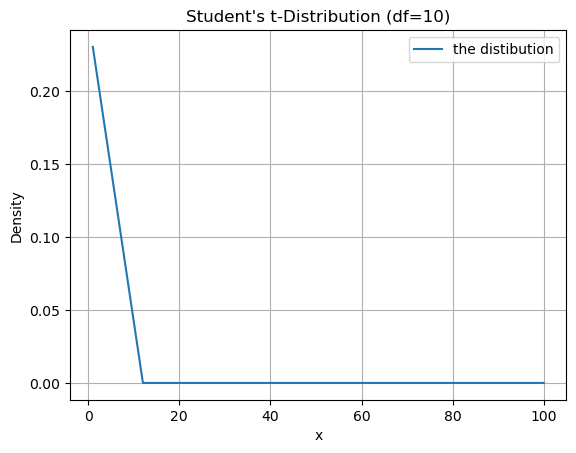

In [31]:
import  matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

df = 10
nw = np.linspace(1,100,10)
ne = t.pdf(nw,df)

plt.plot(nw,ne, label='the distibution')

plt.title('Student\'s t-Distribution (df=10)')
plt.xlabel('x')
plt.ylabel('Density')


plt.legend()
plt.grid(True)
plt.show()

Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two
random samples of equal size and a null hypothesis that the population means are equal.

In [33]:
import numpy as np
from scipy import stats

sample1 = np.array([23, 21, 22, 20, 25, 24, 22, 23, 21, 24])
sample2 = np.array([31, 30, 29, 32, 33, 28, 30, 29, 31, 32])

t_stat, p_value = stats.ttest_ind(sample1, sample2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("We reject the null hypothesis: The population means are significantly different.")
else:
    print("We fail to reject the null hypothesis: The population means are not significantly different.")


T-statistic: -11.31370849898476
P-value: 1.294542172454297e-09
We reject the null hypothesis: The population means are significantly different.


Q11: What is Student’s t distribution? When to use the t-Distribution.

Q12: What is t-statistic? State the formula for t-statistic.

Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random
sample of 50 days and find the sample mean revenue to be $500 with a standard deviation of $50.
Estimate the population mean revenue with a 95% confidence interval.

In [72]:
import math

sample_mean = 500
sample_std = 50
size = 50
z = 1.96 # as the 95% confidence interval 

def finding(sample_mean,z,sample_std,size):
      conf = [
        (sample_mean + z * (sample_std / math.sqrt(size))),
        (sample_mean - z * (sample_std / math.sqrt(size)))
    ]
      return conf

nw = finding(500,1.96,50,50)
print(f'the range of population mean might be between {nw}')

the range of population mean might be between [513.8592929112564, 486.1407070887437]


Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a
clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a
standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.

Null hypthosis :The drug decreases blood pressure by 10 mmHg:μ=10
Alternative hypothesis The drug decreases blood pressure by less than 10 mmHg.
μ<10 (One-tailed test)

In [75]:
import scipy.stats as stats


sample_mean = 8 
hypothesized_mean = 10 
sample_std = 3  
sample_size = 100  
alpha = 0.05  

t_statistic = (sample_mean - hypothesized_mean) / (sample_std / (sample_size ** 0.5))


df = sample_size - 1 
critical_t = stats.t.ppf(alpha, df) 

p_value = stats.t.cdf(t_statistic, df) 

print(f"T-statistic: {t_statistic:.2f}")
print(f"Critical t-value: {critical_t:.2f}")
print(f"P-value: {p_value:.4f}")

if t_statistic < critical_t:
    print("Reject the null hypothesis: The drug decreases blood pressure by less than 10 mmHg.")
else:
    print("Fail to reject the null hypothesis: There is insufficient evidence to support the claim.")

T-statistic: -6.67
Critical t-value: -1.66
P-value: 0.0000
Reject the null hypothesis: The drug decreases blood pressure by less than 10 mmHg.


Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a
standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight
is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5
pounds with a significance level of 0.01.

In [78]:
import math
from scipy.stats import norm


mu = 5  
sigma = 0.5  
n = 25  
x_bar = 4.8  
alpha = 0.01

z = (x_bar - mu) / (sigma / math.sqrt(n))

z_critical = norm.ppf(alpha)

if z < z_critical:
    result = "Reject the null hypothesis. The true mean weight is less than 5 pounds."
else:
    result = "Fail to reject the null hypothesis. There is not enough evidence to say the true mean weight is less than 5 pounds."

z, z_critical, result

(-2.0000000000000018,
 -2.3263478740408408,
 'Fail to reject the null hypothesis. There is not enough evidence to say the true mean weight is less than 5 pounds.')

In [92]:
from scipy import stats
import numpy as np
from scipy import stats

data1 = np.random.normal(70, 8, 30)  
data2 = np.random.normal(75, 10, 30) 


t_statistic, p_value = stats.ttest_ind(data1, data2)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

df = (std1**2/n1 + std2**2/n2)**2 / ((std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1))


alpha = 0.01
critical_t = stats.t.ppf(1 - alpha/2, df) 


print(f"Degrees of Freedom: {df:.2f}")
print(f"Critical t-value for alpha = {alpha}: {critical_t:.3f}")

if abs(t_statistic) > critical_t:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

T-statistic: -3.36719842987593
P-value: 0.001353305656102772
Degrees of Freedom: 54.23
Critical t-value for alpha = 0.01: 2.670
Reject the null hypothesis.


Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV
program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard
deviation of 1.5. Estimate the population mean with a 99% confidence interval.

In [94]:
import numpy as np
from scipy import stats

sample_mean = 4
sample_std = 1.5
n = 50
confidence_level = 0.99

df = n - 1

t_value = stats.t.ppf((1 + confidence_level) / 2, df)

margin_of_error = t_value * (sample_std / np.sqrt(n))

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"99% Confidence Interval: ({lower_bound:.3f}, {upper_bound:.3f})")

99% Confidence Interval: (3.431, 4.569)
